## Introduction

Loan default prediction is a critical problem in the financial sector, as
incorrect lending decisions can result in significant financial losses.
The objective of this project is to predict whether a customer is likely
to default on a loan using historical credit data.

In addition to building a classification model, this project incorporates
business cost optimization. By considering the costs of false positives and
false negatives, the model aims to minimize overall financial loss rather
than relying solely on accuracy.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv("GermanCredit.csv")
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [15]:
df.describe()


,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,credit_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [16]:
df.columns


Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [18]:
df['credit_risk'].value_counts()


,count
credit_risk,
1,700
0,300


In [19]:
# Features
X = df.drop('credit_risk', axis=1)

# Target
y = df['credit_risk']


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all object (categorical) columns
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on train, transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Probability of default (credit_risk = 1)
y_prob = model.predict_proba(X_test)[:, 1]


In [25]:
# Define business costs
COST_FN = 10000   # Cost if we miss a defaulter (False Negative)
COST_FP = 2000    # Cost if we reject a good customer (False Positive)


In [26]:
from sklearn.metrics import confusion_matrix

def business_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn * COST_FN + fp * COST_FP


In [27]:
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.05)
costs = []

for t in thresholds:
    preds = (y_prob >= t).astype(int)
    costs.append(business_cost(y_test, preds))

best_threshold = thresholds[np.argmin(costs)]
best_threshold


np.float64(0.1)

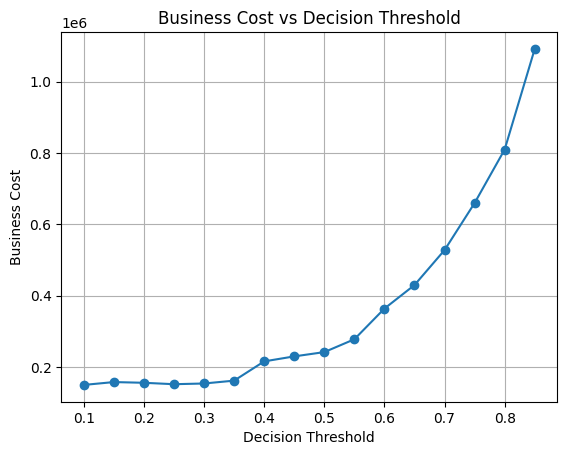

In [28]:
import matplotlib.pyplot as plt

plt.plot(thresholds, costs, marker='o')
plt.xlabel("Decision Threshold")
plt.ylabel("Business Cost")
plt.title("Business Cost vs Decision Threshold")
plt.grid(True)
plt.show()


In [29]:
final_preds = (y_prob >= best_threshold).astype(int)

print("Optimal Threshold:", best_threshold)
print("Minimum Business Cost:", business_cost(y_test, final_preds))


Optimal Threshold: 0.1
Minimum Business Cost: 150000


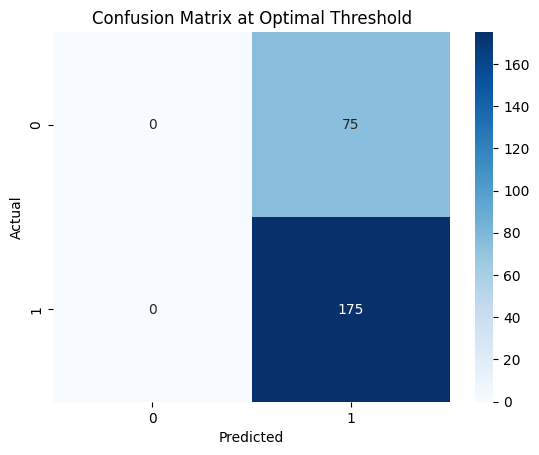

In [30]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix at Optimal Threshold")
plt.show()


## Conclusion

In this project, a logistic regression model was built to predict loan default
using historical credit data. By incorporating business costs into threshold
selection, the model was optimized to minimize financial loss.

This demonstrates how machine learning can be aligned with real-world business
objectives, particularly in financial risk management for banks and lending
institutions.

